In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(data,
                    s = 75,
                    figsize = (40, 20),
                    save_fig = False,
                    pp = None):
    df = data.copy()
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1,
                                y = var2,
                                s = s,
                                ax = ax, 
                                c = "Year",
                                cmap = "spring")
                ax.tick_params(axis='x', 
                               rotation=45)
                ax.tick_params('both', 
                               length=0, 
                               which='both')
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [2]:
!pip install pandas-datareader --user

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    for key, val in data_codes.items():
        if i == 0:
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key},
                      inplace = True)
            i = None
        else:
            df[key] = web.DataReader(val, 
                                     "fred",start, end).resample(freq).mean()

    return df

In [4]:
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Inflation": "T10YIE",
               "Unemployment Rate": "UNRATE"}
start = datetime.datetime(2000, 
                          1,
                          1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "M")

I chose inflation and the unemployment rate. While they may seem random right away, I chose it because when money is worth less, it would make sense that less people would want to work. 

In [5]:
data

,Inflation,Unemployment Rate
DATE,,
2003-01-31,1.754286,5.8
2003-02-28,1.912632,5.9
2003-03-31,1.862857,5.9
2003-04-30,1.774762,6.0
2003-05-31,1.660952,6.1
...,...,...
2021-06-30,2.342727,5.9
2021-07-31,2.327619,5.4
2021-08-31,2.348636,5.2


In [6]:
from matplotlib.backends.backend_pdf import PdfPages
def plot_lines(df, 
               linewidth = 1, 
               figsize = (40,20),
               secondary_y = None, 
               legend=True, 
               pp = None, 
               save_fig = False):
    
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth, 
        ax = ax, 
        secondary_y=secondary_y, 
        legend = legend)
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params('both', length=0, which='both')
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals]) 
    
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + filename[:50] + " line.png", 
                bbox_inches = "tight")
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

<ipython-input-6-7887ab94efe1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


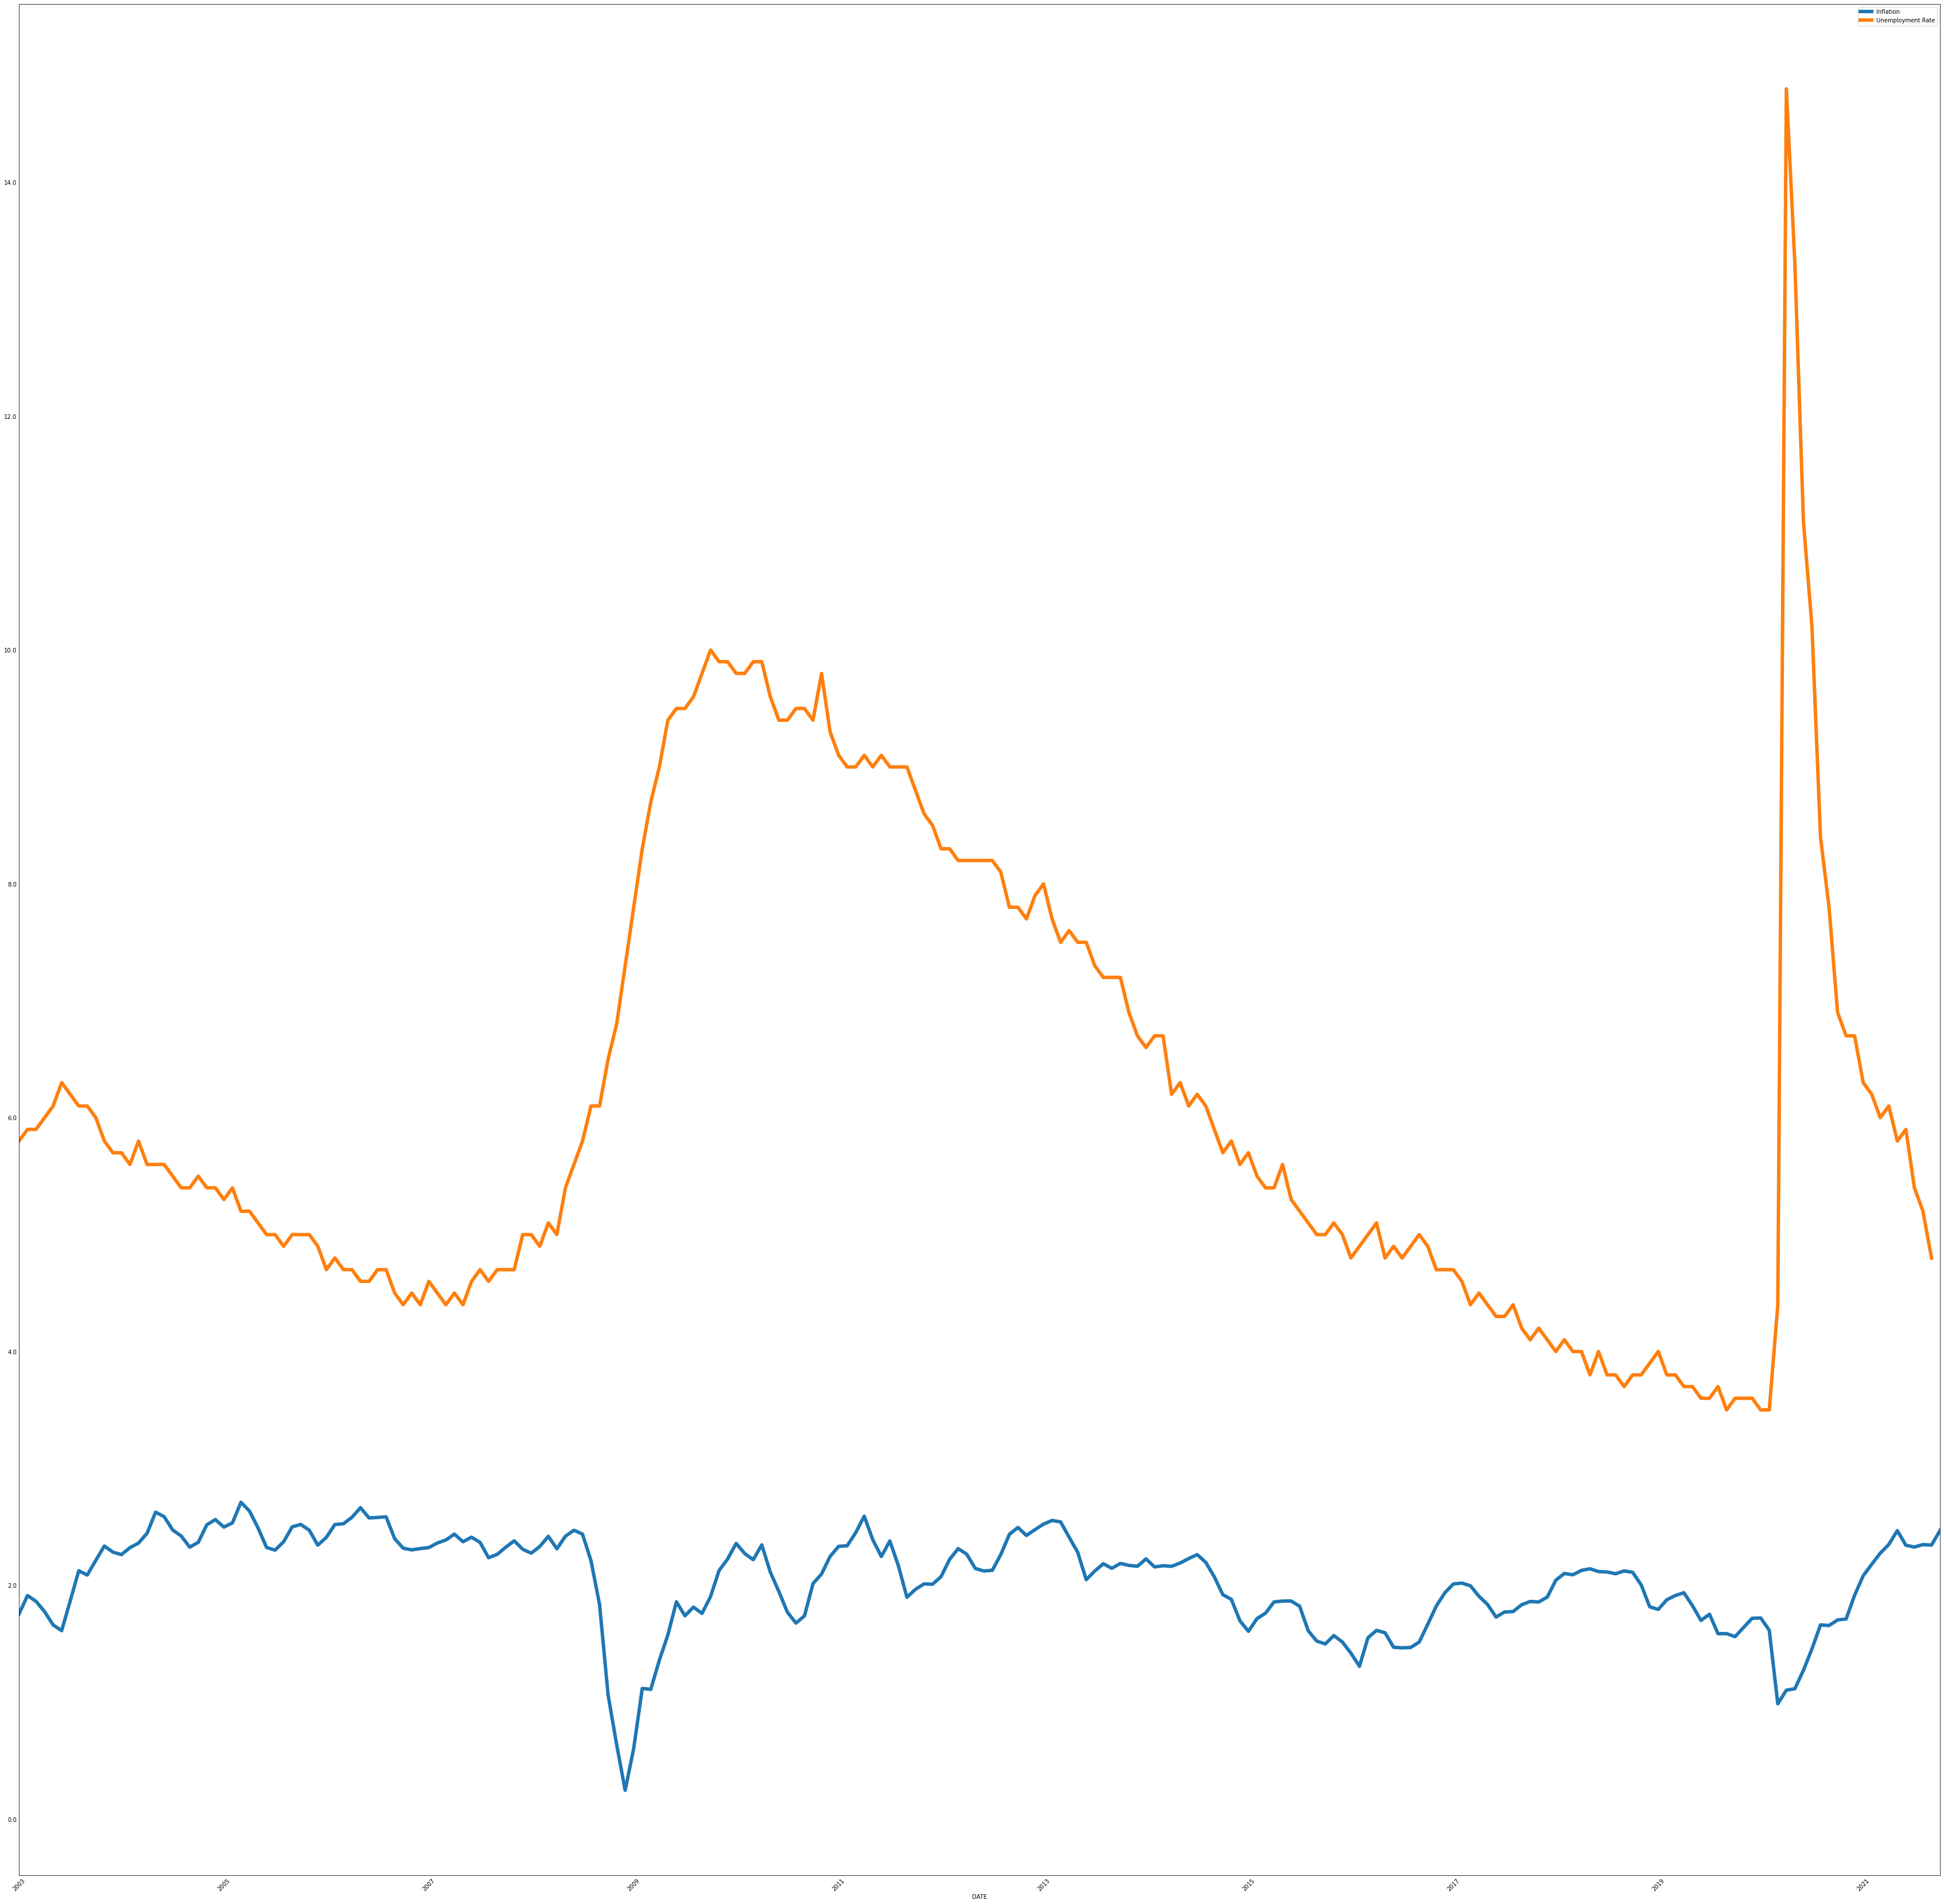

In [7]:
plot_lines(df = data,
           linewidth = 6, 
           figsize = (60, 60), 
           pp = None)

As we can see in the graph above, Inflation and the Unemployment Rate are quite inversely related.

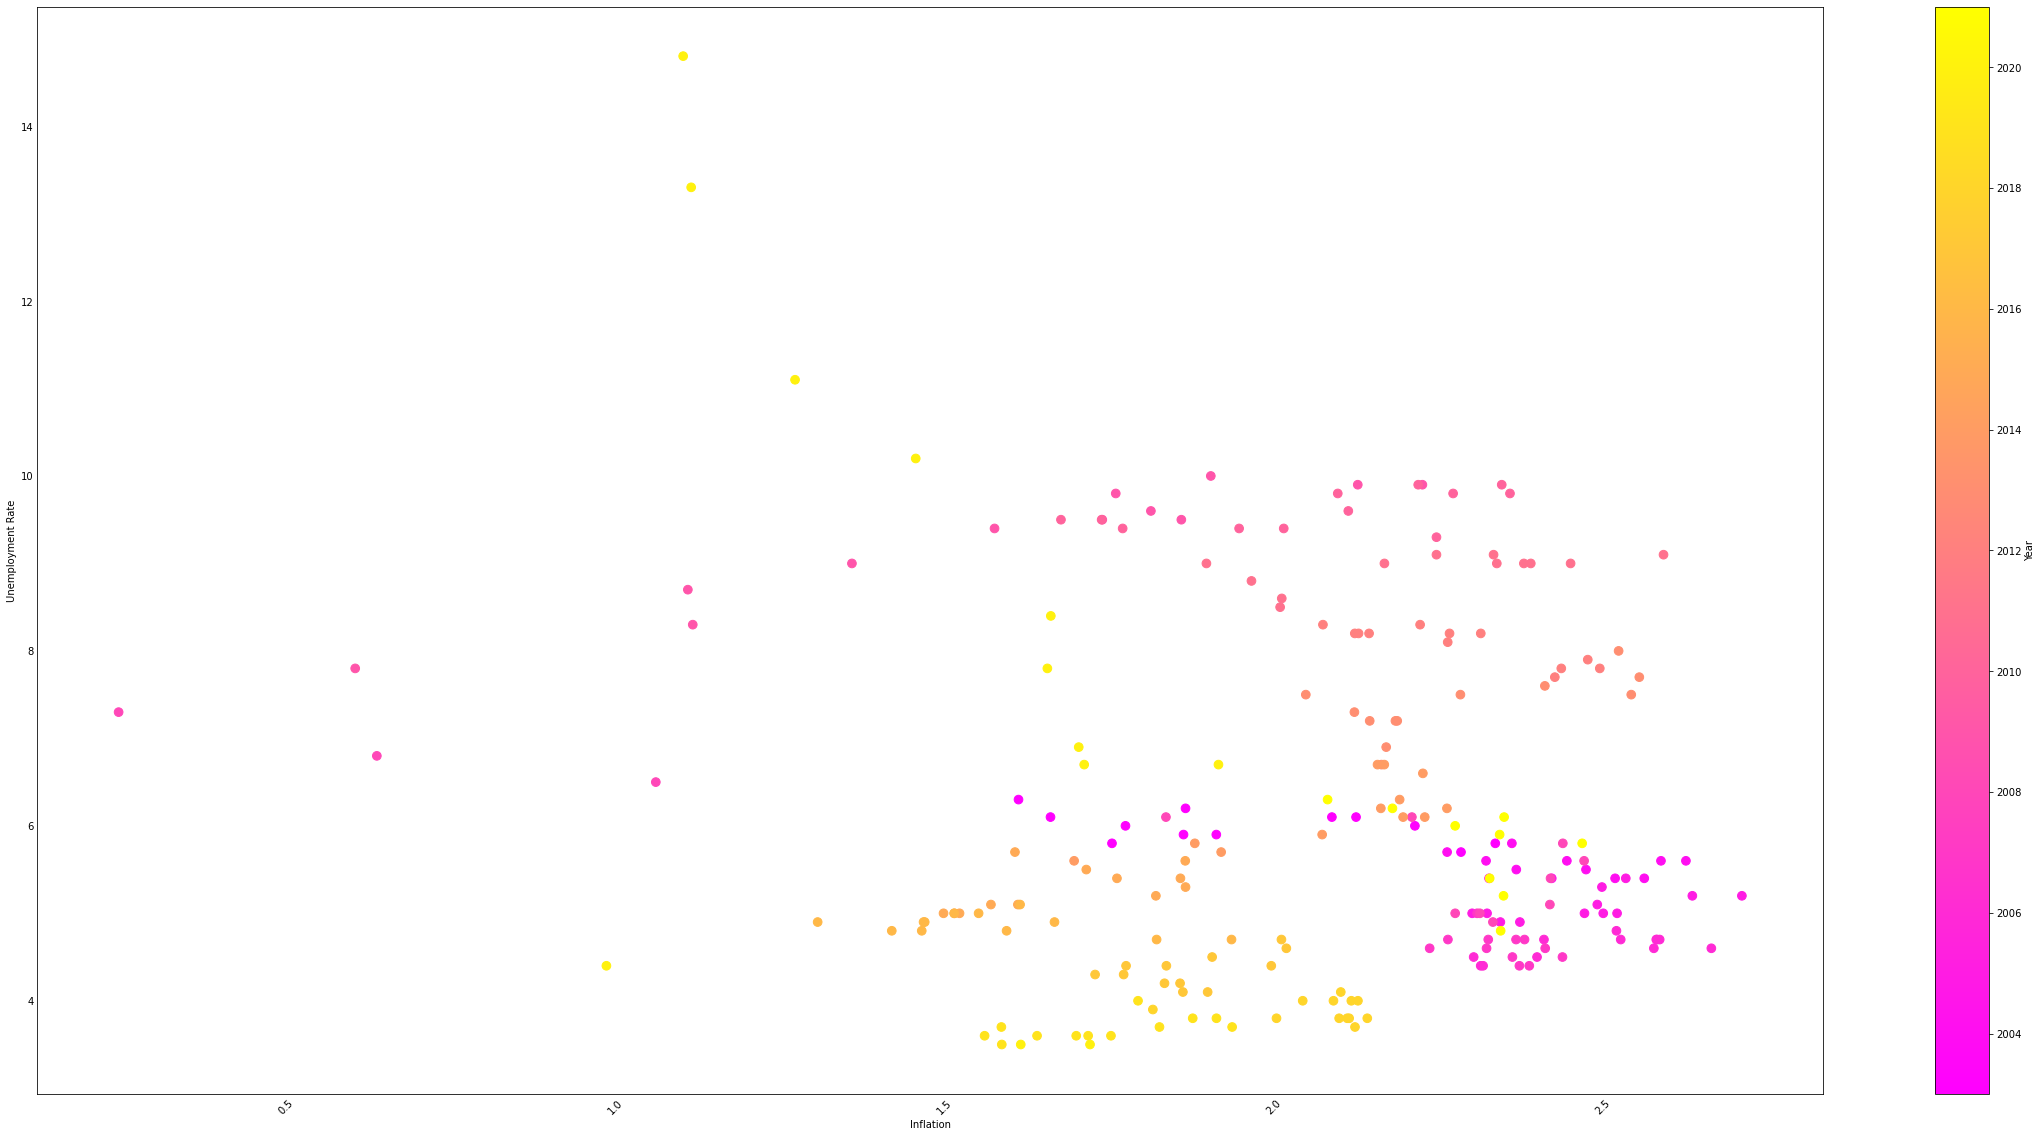

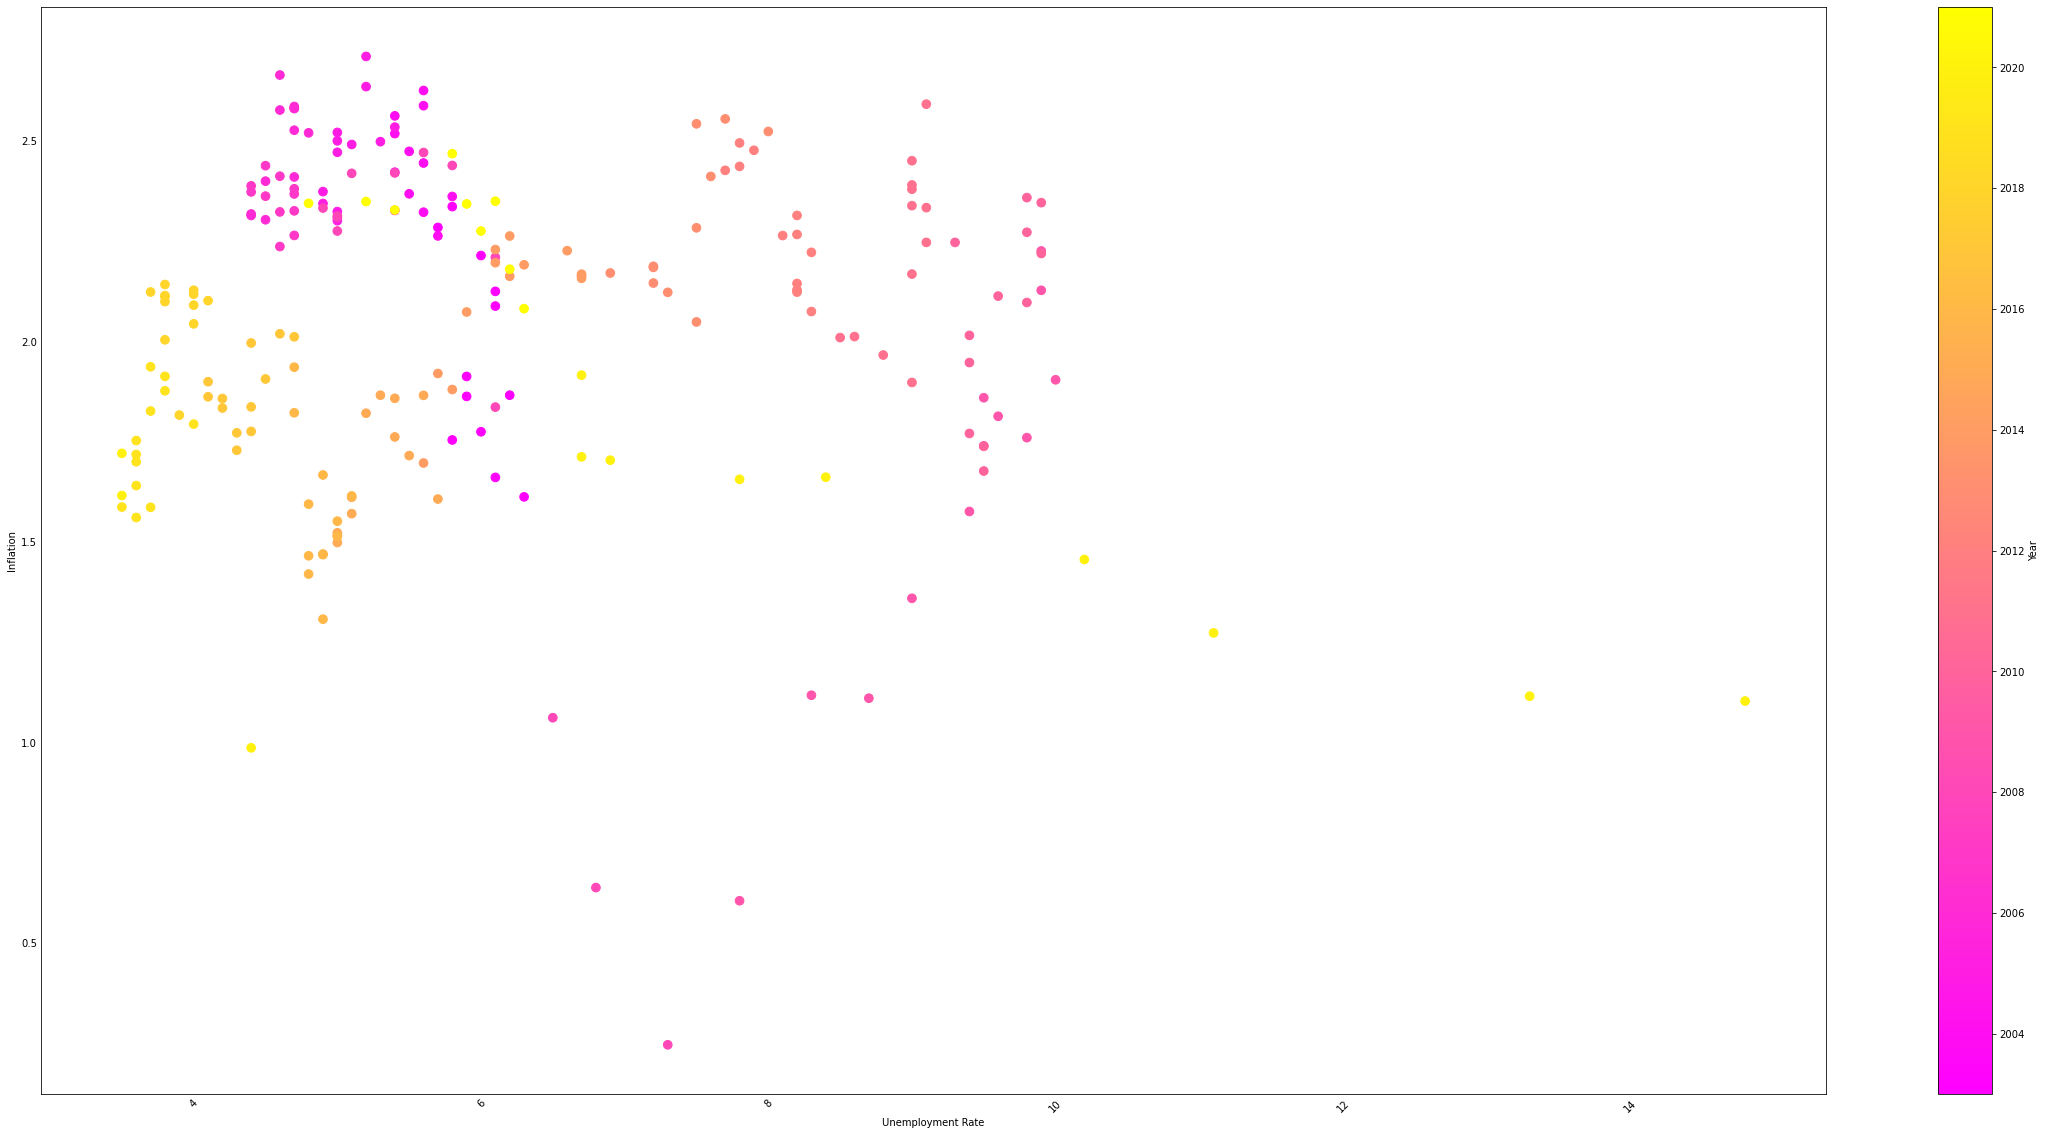

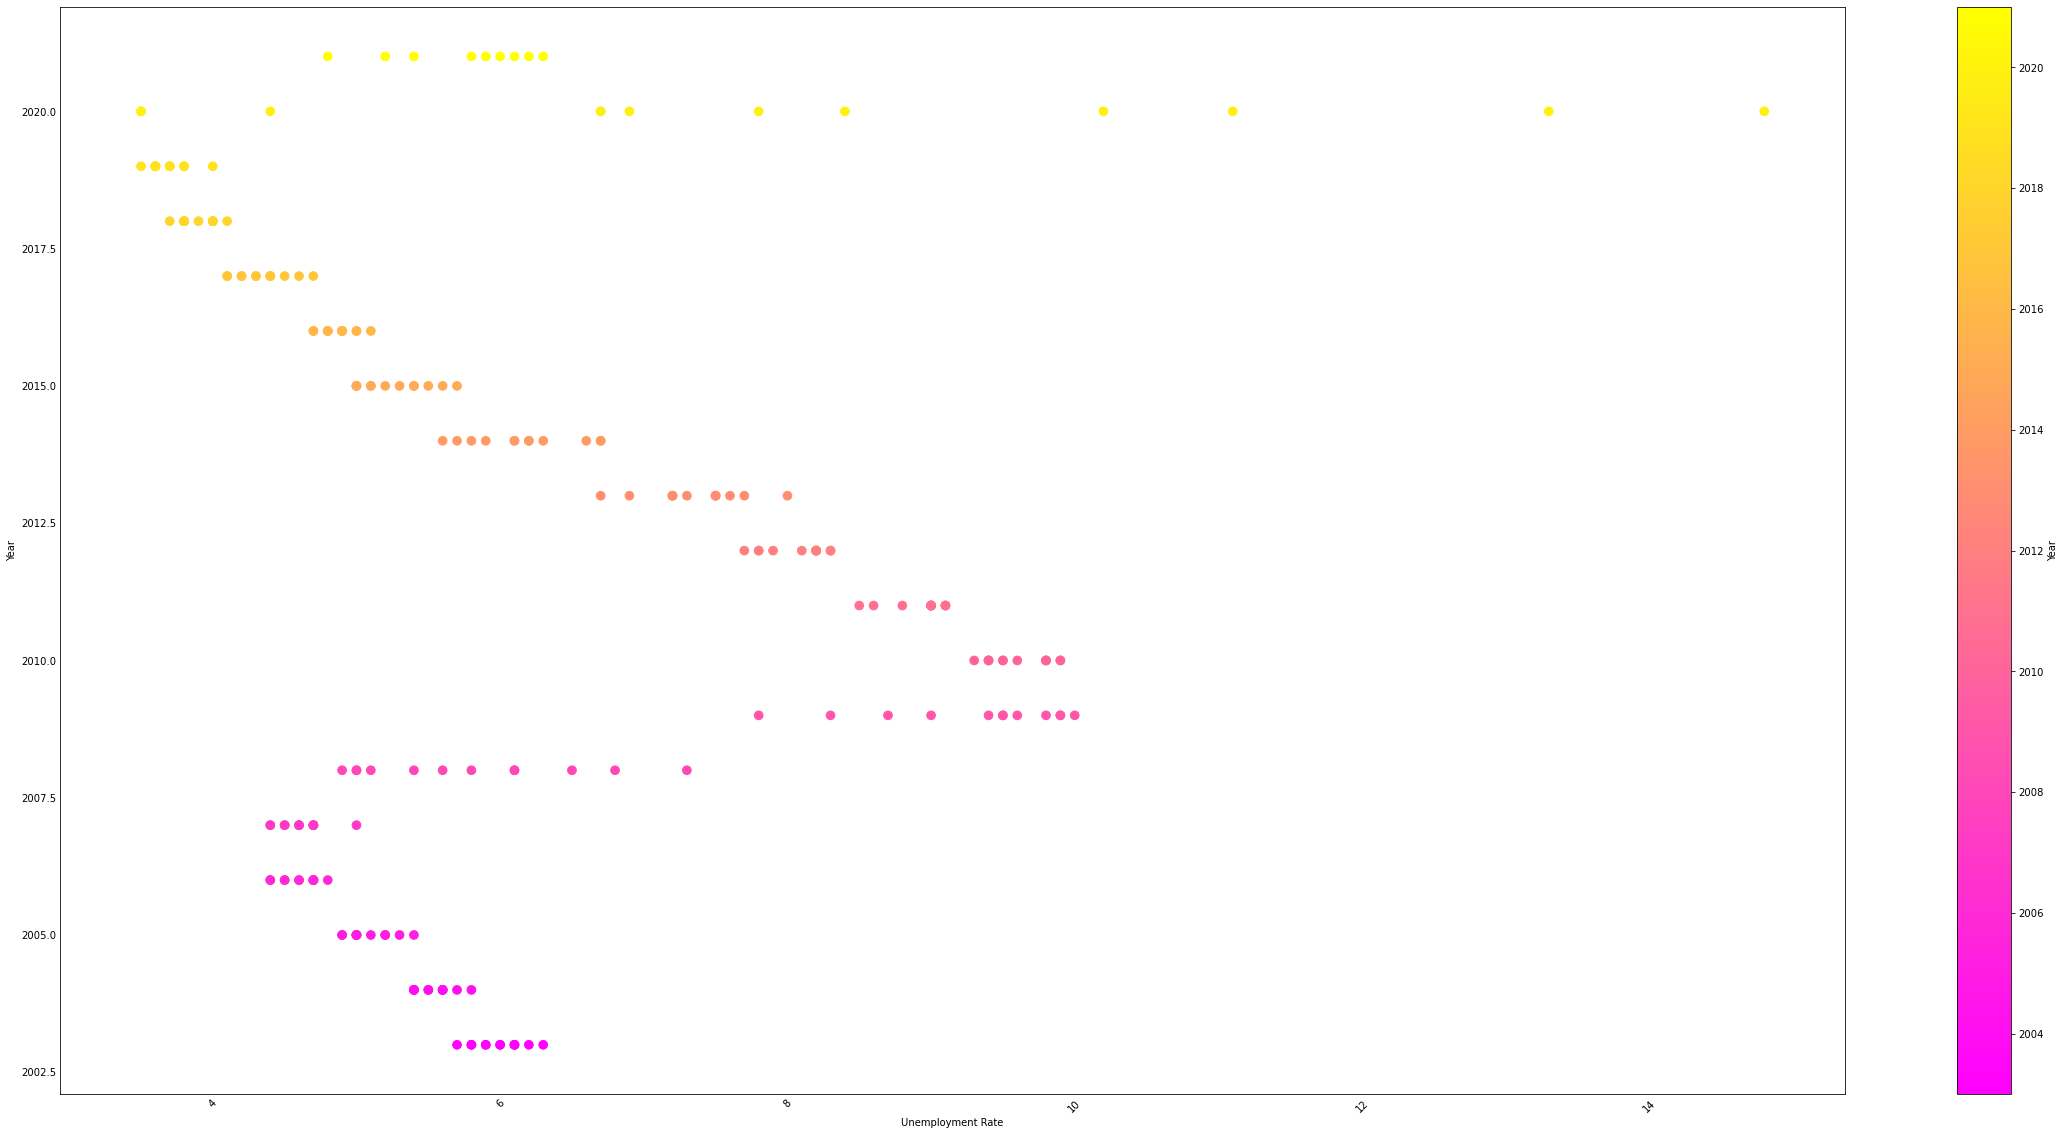

In [8]:
plot_ts_scatter(data[data_codes])

Over time, Inflation and the Unemployment Rate have been less correlated.